# Business Process Lifecycle

#### Customer Onboarding
Customer Onboarding Touchpoints:
- Account opening 
- Welcome emails/calls

Customer Onboarding Activities:
- Collect customer data
- Set up account
- Initial customer service interaction

#### Product and Service Offers
Product and Service Offers Touchpoints
- Targeted email marketing
-  Personalized offers through email, calls and app notifications

Product and Service Offers Activities:
- Analyze customer data to tailor offers
-  Send promotions and offers
- Follow-up on offer acceptance

#### Feedback and Surveys
Feedback and Surveys Touchpoints
- Email surveys
- Calls for feedback after service interactions

Feedback and Surveys Activities:
- Collect customer feedback
- Analyze feedback for service improvement

#### Churn Warning Signs
Churn Warning Signs Identification Touchpoints
- Decrease in account activity
- Negative feedback responses

Churn Warning Signs Identification  Activities:
- Monitor account activity and feedback
- Flag accounts at risk of churn

#### Retention Efforts
Retention Efforts Touchpoints
- Personalized retention offers
-  Direct calls from relationship managers

Retention Efforts Activities:
- Develop retention strategies
- Implement personalized retention offers
- Direct engagement from customer service

#### Churn or Retention Outcome
Churn or Retention Outcome Touchpoints
- Account closure process
- Confirmation of retention offers acceptance

Churn or Retention Outcome Activities:
-  Process account closure
- Update customer records for retained customers

**The main objective is to assist the company in improving customer retention by identifying churn risks.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("churn_all.csv")

## Display basic information about the dataset

In [3]:
data.head()

,Unnamed: 0,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   State             7032 non-null   object 
 6   Latitude          7032 non-null   float64
 7   Longitude         7032 non-null   float64
 8   ZipCode           7032 non-null   int64  
 9   PhoneService      7032 non-null   object 
 10  MultipleLines     7032 non-null   object 
 11  InternetService   7032 non-null   object 
 12  OnlineSecurity    7032 non-null   object 
 13  OnlineBackup      7032 non-null   object 
 14  DeviceProtection  7032 non-null   object 
 15  TechSupport       7032 non-null   object 
 16  StreamingTV       7032 non-null   object 


In [7]:
data.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
State               0
Latitude            0
Longitude           0
ZipCode             0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Tenure              0
Contract            0
PaymentMethod       0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.shape

(7032, 25)

In [9]:
data.describe()

,Latitude,Longitude,ZipCode,Tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,36.283307,-119.799215,93523.032565,32.421786,64.798208,2283.300441
std,2.456118,2.157588,1865.515958,24.545260,30.085974,2266.771362
min,32.555828,-124.301372,90001.000000,1.000000,18.250000,18.800000
25%,34.030915,-121.815412,92102.000000,9.000000,35.587500,401.450000
50%,36.391777,-119.735410,93552.500000,29.000000,70.350000,1397.475000
75%,38.227285,-118.043237,95354.000000,55.000000,89.862500,3794.737500
max,41.962127,-114.192901,96161.000000,72.000000,118.750000,8684.800000


## Distribution of the target variable

In [10]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [12]:
data.Churn.value_counts()/data.shape[0]*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

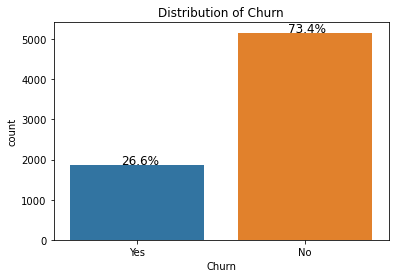

In [14]:
# Prepare the countplot with percentages
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')

# Calculate percentages
total = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), size=12)

plt.show()

TelcoX Mobile experiences a churn rate of 26.54%

In [45]:
data.groupby("Churn")["TotalCharges"].sum()

Churn
No     13193241.8
Yes     2862926.9
Name: TotalCharges, dtype: float64

In [46]:
data.groupby("Churn")["MonthlyCharges"].sum()

Churn
No     316530.15
Yes    139130.85
Name: MonthlyCharges, dtype: float64

## Exploratory Data Analysis (EDA) for each column

In [18]:
# Categorical columns
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaymentMethod', 'PaperlessBilling']

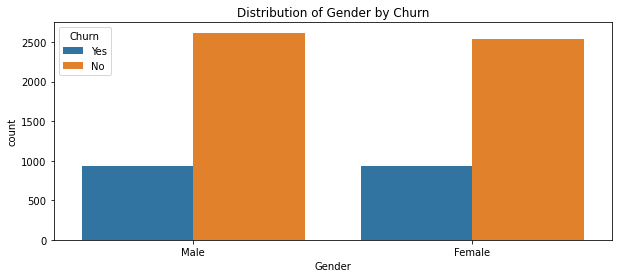

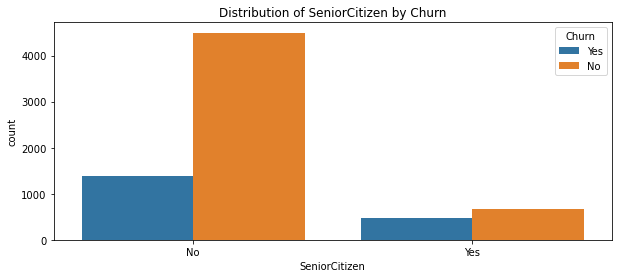

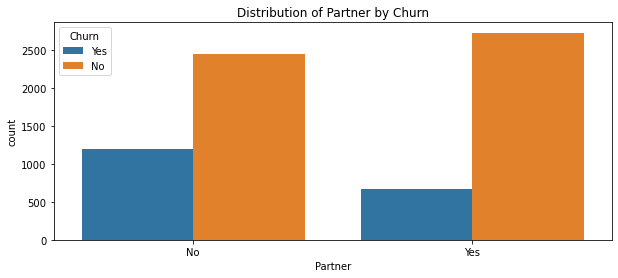

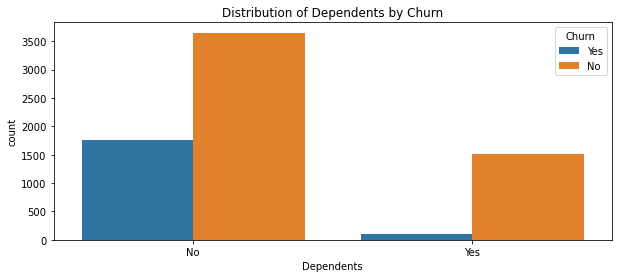

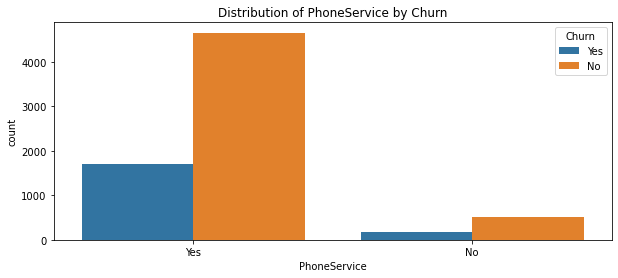

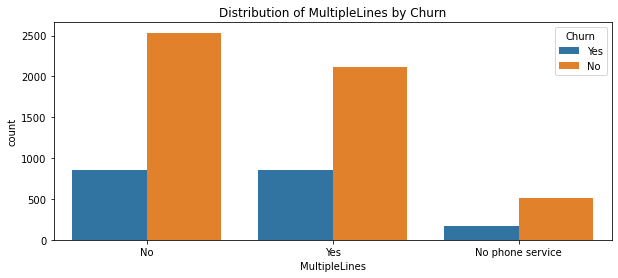

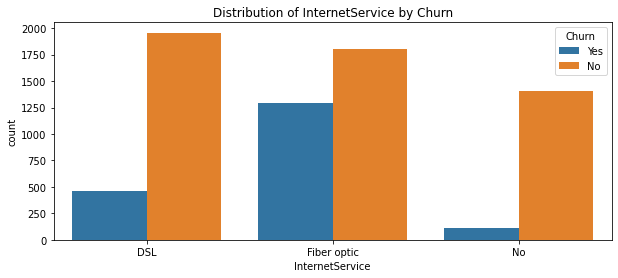

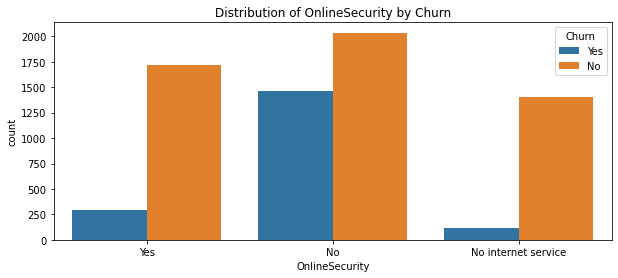

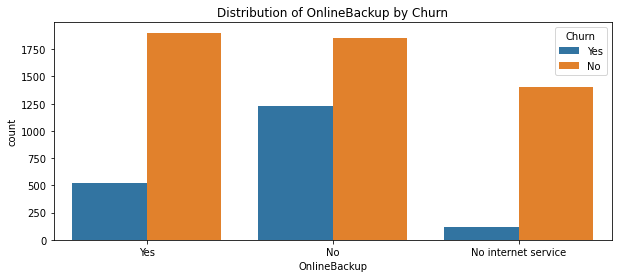

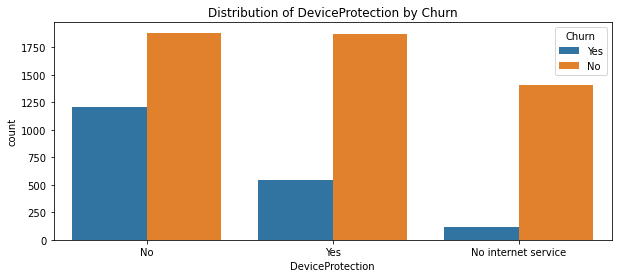

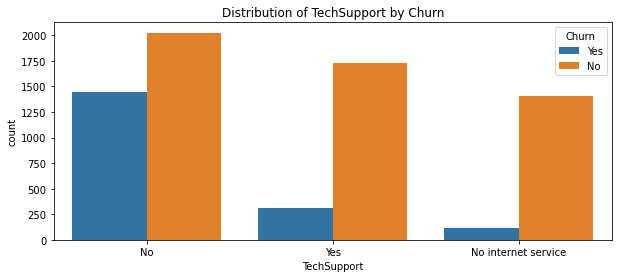

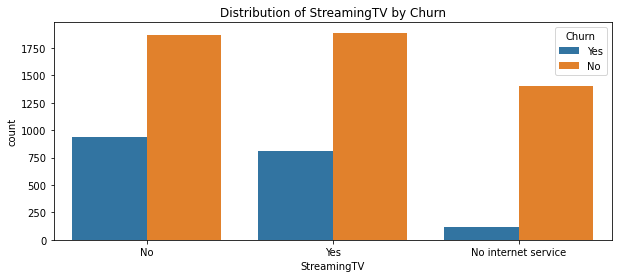

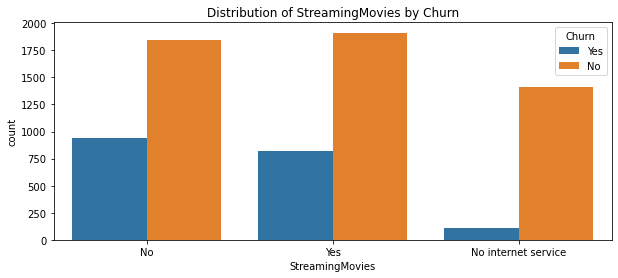

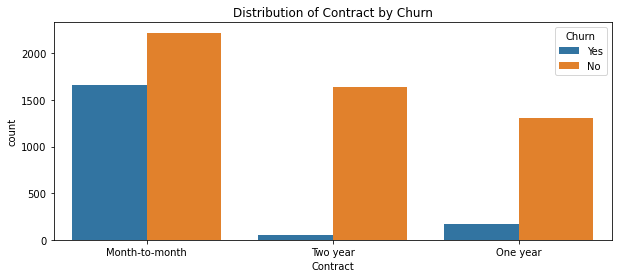

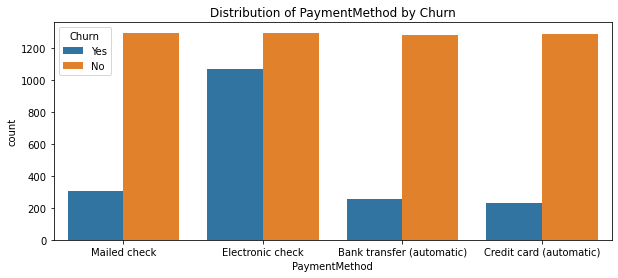

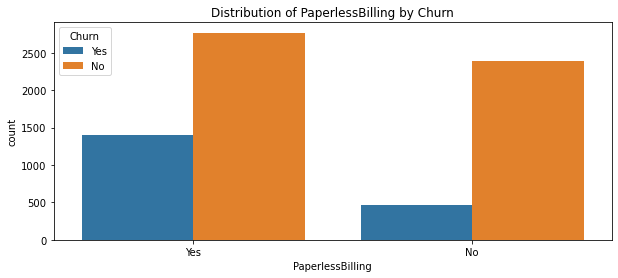

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data, hue='Churn')
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

### Observations
- Both male and female customers have a relatively similar churn rate, indicating that gender does not play a significant role in customer churn.
- Senior citizens have a slightly higher churn rate compared to non-senior citizens.
- Customers without partners show a higher churn rate compared to those with partners.
- Customers without dependents have a higher churn rate compared to those with dependents.
- Customers with phone service show higher churn rates compared to those without.
- Customers with multiple lines show higher churn rates compared to those without.
- Customers with Fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.
- Customers without online security services have higher churn rates.
- Customers without online backup services have higher churn rates.
- Customers without device protection services have higher churn rates.
- Customers without tech support services have higher churn rates.
- Customers without streaming TV services have a higher churn rate.
- Similar to streaming TV, customers without streaming movie services show higher churn rates.
- Customers with month-to-month contracts have higher churn rates compared to those with one or two-year contracts.
- Customers using electronic checks have higher churn rates compared to other payment methods.
- Customers with paperless billing show higher churn rates.


### Recommendations
- Focus on customer segments with higher churn rates, such as senior citizens, customers without partners or dependents, and those with specific service needs.
- Conduct satisfaction surveys to identify phone service quality issues and promptly resolve them through dedicated support.
- Invest in improving call clarity, network coverage and overall reliability and quality of phone and internet services.
- Address high churn among Fiber optic users by investigating connection issues, implementing upgrades, and offering technical support and promotions.
- Bundle basic online security and tech support with standard packages, and offer affordable upgrades to advanced security and support features.. Highlight the importance of online security and tech support in marketing campaigns.
- Include device protection and online backup services in premium packages with introductory discounts.
- Enhance streaming TV and movie content quality, offer exclusive shows and deals, and provide bundled promotional offers.
- Encourage longer-term contracts by highlighting cost savings and benefits, and offering incentives.
- Encourage customers to switch from electronic checks to more stable payment methods like automatic transfers or credit cards with incentives.
- Improve the user experience of paperless billing and offer support and incentives for adoption.
- Develop family or partner packages that offer better value for customers with dependents and personalized promotions for single customers to enhance their perceived value.
- Engage customers showing early signs of churn with care calls, targeted offers, and service improvements.
- Continuously collect and analyze customer feedback to drive service improvements and enhance overall customer satisfaction.

In [22]:
# Numerical columns
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

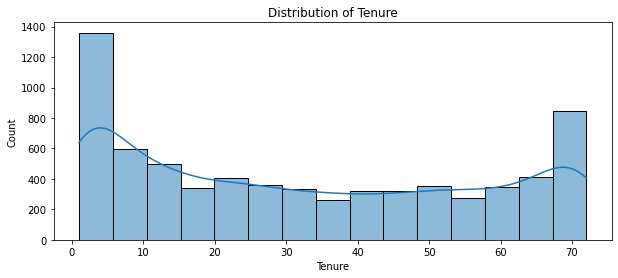

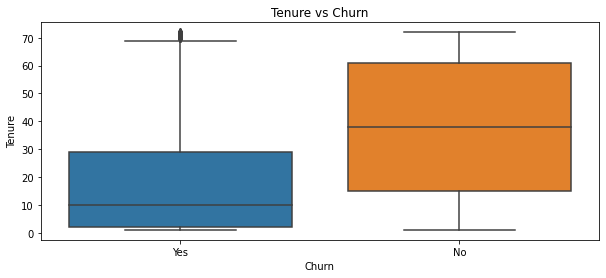

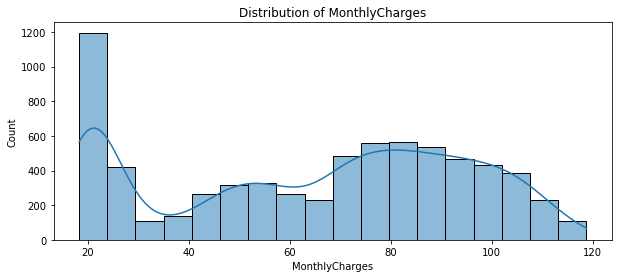

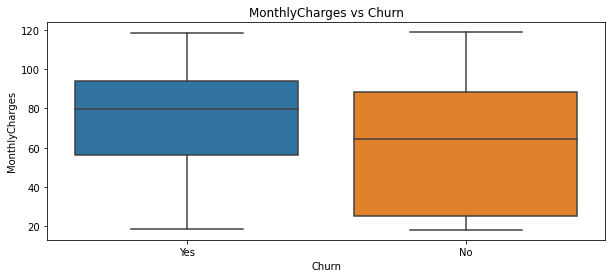

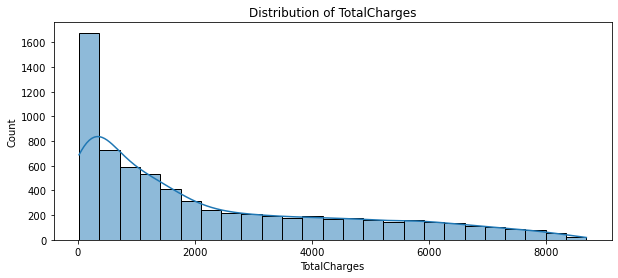

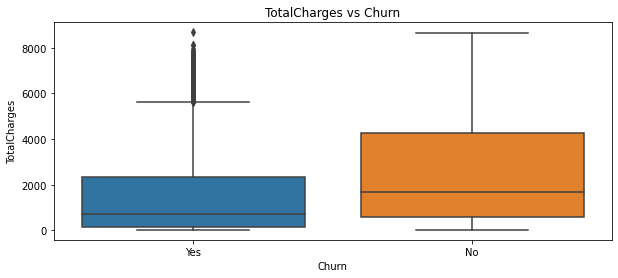

In [23]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} vs Churn')
    plt.show()

### Observations
- The tenure distribution shows that many customers have short tenures, with a significant peak at the beginning (0-10 months) and another at the end (60-70 months). This suggests a pattern where customers either leave quickly or stay for a long time.
- The median tenure for churned customers is around 10 months, while for non-churned customers, it is significantly higher. This indicates that longer-tenure customers are less likely to churn. 
- The monthly charges distribution is bimodal, with peaks around 20 and 80 dollars. This suggests that there are two main pricing tiers or service packages that customers opt for.
- The boxplot shows that customers who churn tend to have higher monthly charges compared to those who do not churn. This could indicate that higher-priced plans may lead to dissatisfaction or affordability issues, leading to higher churn rates.
- The total charges distribution is right-skewed, with most customers having total charges below 2000 dollars. This is expected as total charges accumulate over time.
- The boxplot indicates that churned customers generally have lower total charges, which aligns with the finding that they have shorter tenures. High total charges correspond to customers with longer tenures who are less likely to churn.

### Recommendations
- Focus on onboarding and engagement programs for new customers to increase their initial satisfaction and reduce early churn. Implement welcome offers, regular check-ins, and personalized support during the first year.
- Use customer data to send personalized communications, offers, and recommendations. Tailoring interactions based on customer profiles can enhance satisfaction and loyalty.
- Develop loyalty programs that reward long-term customers to prevent churn among those with long tenures. This can include exclusive discounts, special offers, or loyalty points for continued service.
- Ensure that high-paying customers perceive value for their money. This can be achieved by bundling additional services or offering premium support for higher-tier plans.
- Introduce flexible pricing plans that allow customers to choose services à la carte, ensuring they pay only for what they use, which can help reduce the financial burden and increase satisfaction.
- Regularly collect feedback from new customers to identify and address any issues early. This proactive approach can help in resolving problems before they lead to churn. Implement a multi-channel support strategy, including chat, phone, and email, to cater to different customer preferences.

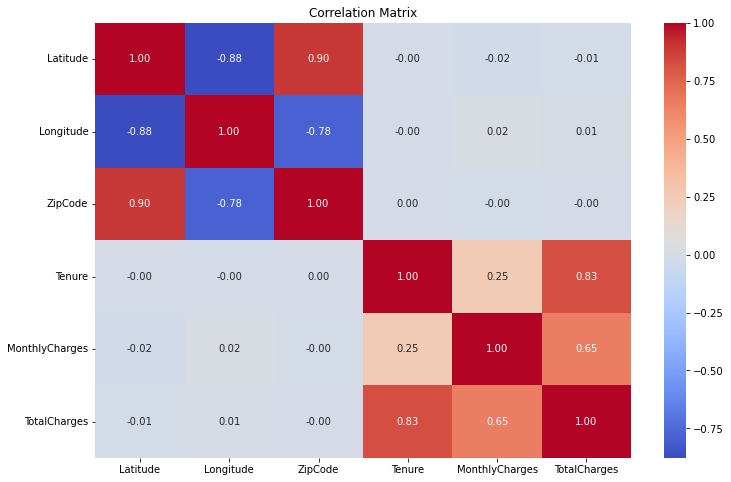

In [53]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Tenure has a moderate positive correlation with MonthlyCharges (0.25) and a strong positive correlation with TotalCharges (0.83). This indicates that longer-tenure customers tend to have higher total charges and somewhat higher monthly charges.
- MonthlyCharges shows a strong positive correlation with TotalCharges (0.65), indicating that customers with higher monthly charges accumulate higher total charges over time.

### Key Drivers of Customer Churn:


- Senior citizens, customers without partners, and those without dependents have higher churn rates compared to their counterparts, suggesting that these groups may have specific needs or lack perceived value in the services provided. 
- Customers with multiple lines show higher churn rates, possibly due to higher costs or complexity in managing multiple lines.
- Customers with Fiber optic internet service have a higher churn rate compared to those with DSL or no internet service. 
- Customers without online security services have higher churn rates, suggesting that security concerns may drive customers to leave.
- Customers without online backup services have higher churn rates, indicating the importance of data protection services.
- Customers without device protection services have higher churn rates, highlighting the need for device insurance or repair services.
- Customers without tech support services have higher churn rates, emphasizing the importance of accessible technical assistance.
- Customers without streaming TV and movie services show higher churn rates, suggesting that entertainment services are a significant value add for retaining customers.
- Customers using electronic checks have higher churn rates compared to other payment methods. This might be due to the inconvenience or perceived risk associated with electronic check payments.
- Customers with paperless billing show higher churn rates, possibly due to usability issues or a preference for traditional billing methods.
- Customers with month-to-month contracts have higher churn rates compared to those with one or two-year contracts. This indicates that longer-term contracts may help in retaining customers by creating a sense of commitment and stability.
- Higher monthly charges are associated with higher churn rates. Customers with higher bills may feel they are not receiving adequate value, leading to dissatisfaction and churn.
